         Date       Close    Return Direction
0  2017-11-16  231.126007       NaN      Down
1  2017-11-17  219.569000 -0.050003      Down
2  2017-11-20  208.591003 -0.049998      Down
3  2017-11-21  198.190002 -0.049863      Down
4  2017-11-22  188.307007 -0.049866      Down
..        ...         ...       ...       ...
95 2018-04-06  209.076996 -0.001018      Down
96 2018-04-09  203.938004 -0.024579      Down
97 2018-04-10  202.569000 -0.006713      Down
98 2018-04-11  203.511993  0.004655        Up
99 2018-04-12  204.667999  0.005680        Up

[100 rows x 4 columns]


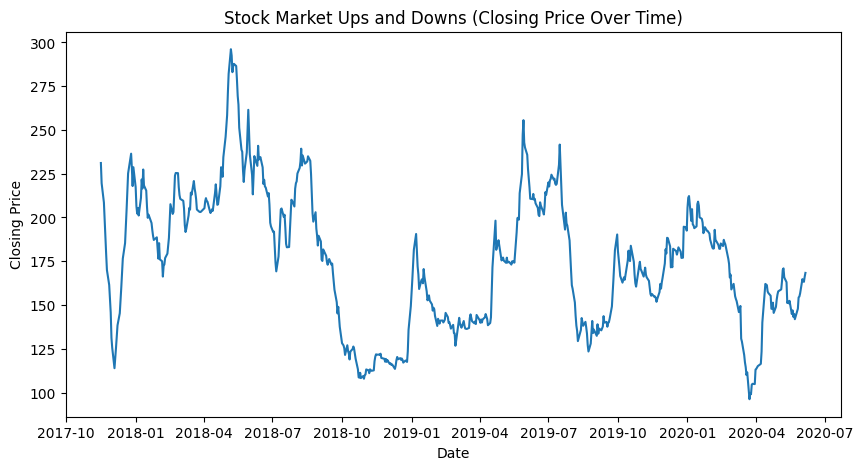

RMSE: 5.947235177899618
       Actual   Predicted
0  119.760002  123.878574
1  224.449997  222.530756
2  216.498001  204.941822
3  181.069000  191.810584
4  258.403992  247.059075


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("S:/Sameet Patil - SEM 7/LP3/codes/stock.csv")

# 2. Keep required columns
df = df[["Date", "Open", "High", "Low", "Close"]]

# Convert Date to datetime and sort
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# 3. Analyze ups & downs (daily returns)
df["Return"] = df["Close"].pct_change()
df["Direction"] = df["Return"].apply(lambda r: "Up" if r > 0 else "Down")

print(df[["Date", "Close", "Return", "Direction"]].head(100))

# ---- SIMPLE ANALYSIS GRAPH ----
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Close"])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Market Ups and Downs (Closing Price Over Time)")
plt.show()

# 4. Predict future stock price (next-day close)
df["Next_Close"] = df["Close"].shift(-1)
df = df.dropna()

X = df[["Open", "High", "Low", "Close"]]
y = df["Next_Close"]

# 5. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predict
pred = model.predict(X_test)

# 8. Evaluate
rmse = root_mean_squared_error(y_test, pred)
print("RMSE:", rmse)

# 9. Show sample results
result = pd.DataFrame({"Actual": y_test.values, "Predicted": pred})
print(result.head())